<h1>Первое задание<h1>

<div style="font-size:1.2em">
<ol>
    <li><input type="checkbox" checked> Посчитать корреляции только для цены</li>
    <li><input type="checkbox" checked> Посмотреть 2 года, 1 год</li>
    <li><input type="checkbox"> Построить moving 1 month correlation для всего года или даже двух</li>
    <li><input type="checkbox"> Проверить, меняется ли эта корреляция со временем</li>

</ol>
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

<h2>Get List of Top 11 Cryptos by Market Cap from coinmarketcap.com</h2>

In [2]:
from coinMarketCap import getTopHistory
dfs = getTopHistory(limit=11, days=90)

pd.DataFrame([dfs[key].iloc[-1]['marketCap'] for key in dfs],index=list(dfs.keys()), columns=['marketCap'])

,marketCap
BTC,1.274831e+12
ETH,5.690943e+11
BNB,1.091405e+11
SOL,7.519846e+10
USDT,7.256745e+10
ADA,7.071047e+10
XRP,6.037647e+10
DOT,5.268583e+10
DOGE,3.728220e+10
USDC,3.434063e+10


<h2>Calculate Pearson and Spearman Correlation by Price for 90 Days</h2>

In [3]:
cols = [dfs['BTC']['timestamp']]
keys = ['timestamp']

for key in dfs:
    cols.append(dfs[key]['close'])
    keys.append(key)
    
closePrice_df = pd.concat(cols,keys=keys,axis=1) #Create dataframe with close Price of all Cryptos
closePrice_df.head()

,timestamp,BTC,ETH,BNB,SOL,USDT,ADA,XRP,DOT,DOGE,USDC,SHIB
0,2021-08-12 23:59:59.999000+00:00,44428.288467,3043.414340,385.818979,41.099363,1.000542,1.823878,0.964549,20.754807,0.263921,1.000092,0.000008
1,2021-08-13 23:59:59.999000+00:00,47793.321179,3322.211756,410.944893,44.894501,1.000260,2.136079,1.089960,22.714149,0.286808,0.999514,0.000008
2,2021-08-14 23:59:59.999000+00:00,47096.945662,3265.443357,409.034499,44.112852,1.000586,2.191687,1.280412,22.861027,0.293113,0.999954,0.000008
3,2021-08-15 23:59:59.999000+00:00,47047.004542,3310.504171,414.595035,53.745160,1.000643,2.169153,1.288160,23.174016,0.341441,0.999849,0.000009
4,2021-08-16 23:59:59.999000+00:00,46004.484079,3156.509427,417.470857,62.432463,1.000438,2.079417,1.190993,24.535857,0.320715,1.000102,0.000009


[Text(0.5, 1.0, 'Spearman correlation by close Price for 90 days')]

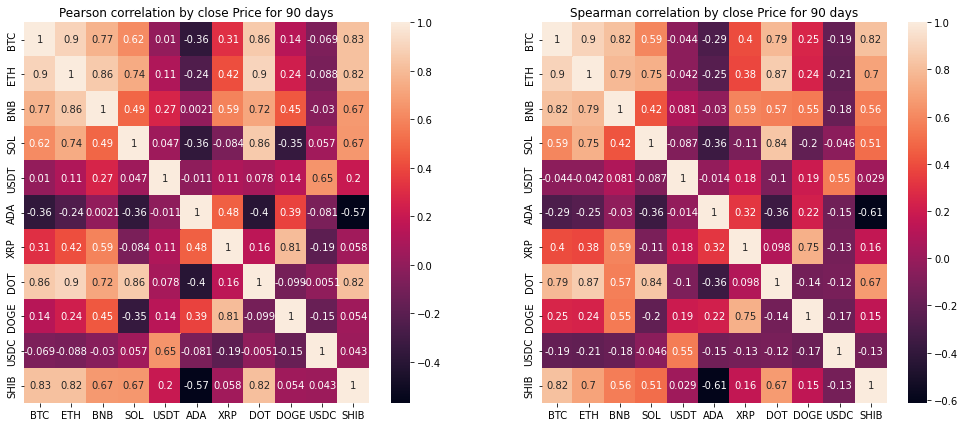

In [4]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(17,7))

pearson_corr = closePrice_df.corr(method='pearson')
sns.heatmap(pearson_corr,ax=ax1, annot=True).set(title="Pearson correlation by close Price for 90 days")

spearman_corr = closePrice_df.corr(method='spearman')
sns.heatmap(spearman_corr,ax=ax2, annot=True).set(title="Spearman correlation by close Price for 90 days")

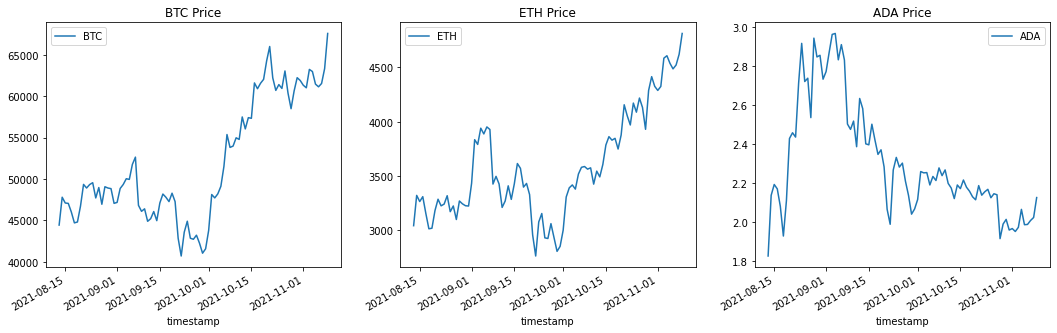

In [5]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(18,5))
for i, crypto in enumerate(['BTC', 'ETH', 'ADA']):
    closePrice_df.plot(ax=axes[i], x='timestamp', y=crypto).set(title=crypto+" Price")

<h1>Calc correlation for 1 Year<h1>

In [6]:
dfsy = getTopHistory(limit=11, days=365)

In [7]:
cols = [dfsy['BTC']['timestamp']]
keys = ['timestamp']

for key in dfsy:
    cols.append(dfsy[key]['close'])
    keys.append(key)
    
closePrice_dfy = pd.concat(cols,keys=keys,axis=1) #Create dataframe with close Price of all Cryptos
closePrice_dfy

,timestamp,BTC,ETH,BNB,SOL,USDT,ADA,XRP,DOT,DOGE,USDC,SHIB
0,2020-11-10 23:59:59.999000+00:00,15290.902681,449.679621,28.193342,2.247987,1.001127,0.105805,0.253911,4.415016,0.002753,1.000325,0.000000
1,2020-11-11 23:59:59.999000+00:00,15701.339732,462.960528,27.956178,2.002124,1.000985,0.105965,0.256259,4.457202,0.002769,1.000150,0.000000
2,2020-11-12 23:59:59.999000+00:00,16276.343949,461.005271,27.614807,1.899138,1.000509,0.104525,0.254903,4.399240,0.002779,0.999207,0.000000
3,2020-11-13 23:59:59.999000+00:00,16317.808190,474.626421,28.182172,2.020792,1.000345,0.106391,0.265190,4.540120,0.002821,1.000012,0.000000
4,2020-11-14 23:59:59.999000+00:00,16068.138707,460.149837,27.936201,1.917016,1.000288,0.104202,0.268342,4.465622,0.002773,1.000224,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
359,2021-11-04 23:59:59.999000+00:00,61452.230587,4537.324081,559.737291,247.387778,1.000857,1.984882,1.202003,53.881732,0.263280,1.000206,0.000049
360,2021-11-05 23:59:59.999000+00:00,61125.674269,4486.243405,608.648048,236.474334,1.001553,1.986206,1.161533,51.894674,0.261465,1.000562,0.000062
361,2021-11-06 23:59:59.999000+00:00,61527.481793,4521.581083,636.113951,258.934312,1.001454,2.006609,1.152454,52.009216,0.261898,1.000345,0.000059
362,2021-11-07 23:59:59.999000+00:00,63326.989028,4620.554503,650.454065,249.823483,1.001517,2.021872,1.217534,52.277980,0.266315,1.000649,0.000057


[Text(0.5, 1.0, 'Spearman correlation by close Price for 1 Year')]

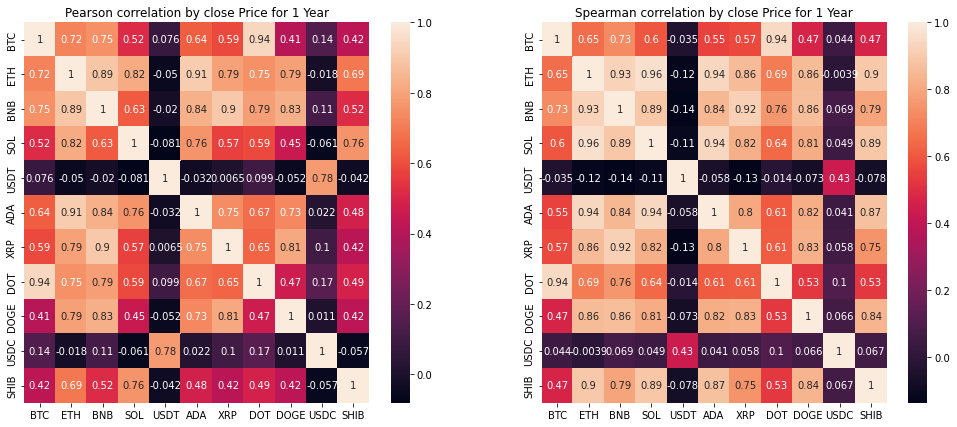

In [8]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, figsize=(17,7))

pearson_corr = closePrice_dfy.corr(method='pearson')
sns.heatmap(pearson_corr,ax=ax1, annot=True).set(title="Pearson correlation by close Price for 1 Year")

spearman_corr = closePrice_dfy.corr(method='spearman')
sns.heatmap(spearman_corr,ax=ax2, annot=True).set(title="Spearman correlation by close Price for 1 Year")

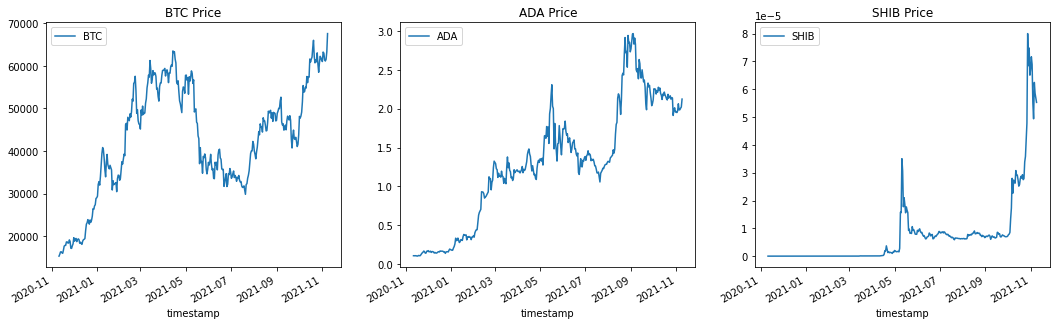

In [9]:
fig, axes = plt.subplots(1, 3, sharex=True, figsize=(18,5))
for i, crypto in enumerate(['BTC', 'ADA', 'SHIB']):
    closePrice_dfy.plot(ax=axes[i], x='timestamp', y=crypto).set(title=crypto+" Price")